# **Project 1 - Sentiment Analysis**

This notebook performs a sentitment analysis of tweets related to Donald Trump and Joe Biden, specifically focusing on tweets from users in the United States who are significanlt affected by the election. The analysis leverages the Valence Aware Dictionary and sEntiment Reasoner (VADER) sentiment analysis tool to evaluate the emotional tone of the tweets.

The main sections of this notebook are:

1. Sentiment Analysis: Utilized VADER to compute negative, neutral, positive, and compound scores for each candidate.

2. Data Visualization: Created imformative visualizations to display results of sentiment analysis.

3. Summary Statistics: Compiled table to show average scores for each candidate.

In [ ]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# read in both csvs
trump_df = pd.read_csv("/content/trump_clean.csv")
biden_df = pd.read_csv("/content/biden_clean.csv")

<ipython-input-180-86fcebbaaf00>:2: DtypeWarning: Columns (0,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  trump_df = pd.read_csv("/content/trump_clean.csv")
<ipython-input-180-86fcebbaaf00>:3: DtypeWarning: Columns (0,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  biden_df = pd.read_csv("/content/biden_clean.csv")


In [ ]:
# define list of U.S. state abbreviations to filter tweets by location
us_states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
    'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
    'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
    'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
    'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

# filter each dataset to include only tweets from U.S. states
trump = trump_df.loc[trump_df['state_code'].isin(us_states)][['tweet','state_code']]
biden = biden_df.loc[biden_df['state_code'].isin(us_states)][['tweet','state_code']]

## Section 1 - Sentiment Analysis

In [ ]:
# initialize VADER
analyzer = SentimentIntensityAnalyzer()

# create function to calculate sentiment (polarity) scores for a given tweet
def calculate_sentiment(tweet):
    return analyzer.polarity_scores(tweet)

# perform sentiment analysis on each tweet and store results in new column 'sentiment'
trump['sentiment'] = trump['tweet'].apply(calculate_sentiment)
biden['sentiment'] = biden['tweet'].apply(calculate_sentiment)

# extract sentiment scores into separate columns
trump[['neg', 'neu', 'pos', 'compound']] = trump['sentiment'].apply(pd.Series)
biden[['neg', 'neu', 'pos', 'compound']] = biden['sentiment'].apply(pd.Series)

In [ ]:
# display first few rows of each dataset to check results
trump.head()
biden.head()

,tweet,state_code,sentiment,neg,neu,pos,compound
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,FL,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
2,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,MT,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
4,#censorship #HunterBiden #Biden #BidenEmails #...,CA,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
6,"In 2020, #NYPost is being #censorship #CENSORE...",IL,"{'neg': 0.133, 'neu': 0.783, 'pos': 0.083, 'co...",0.133,0.783,0.083,-0.5309
11,"FBI Allegedly Obtained Hunter Biden Computer, ...",KY,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000


## Section 2 - Data Visualizations

<ipython-input-184-91106772e4a1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='candidate', y='compound', data=combined, palette={'Trump': 'red', 'Biden': 'blue'})


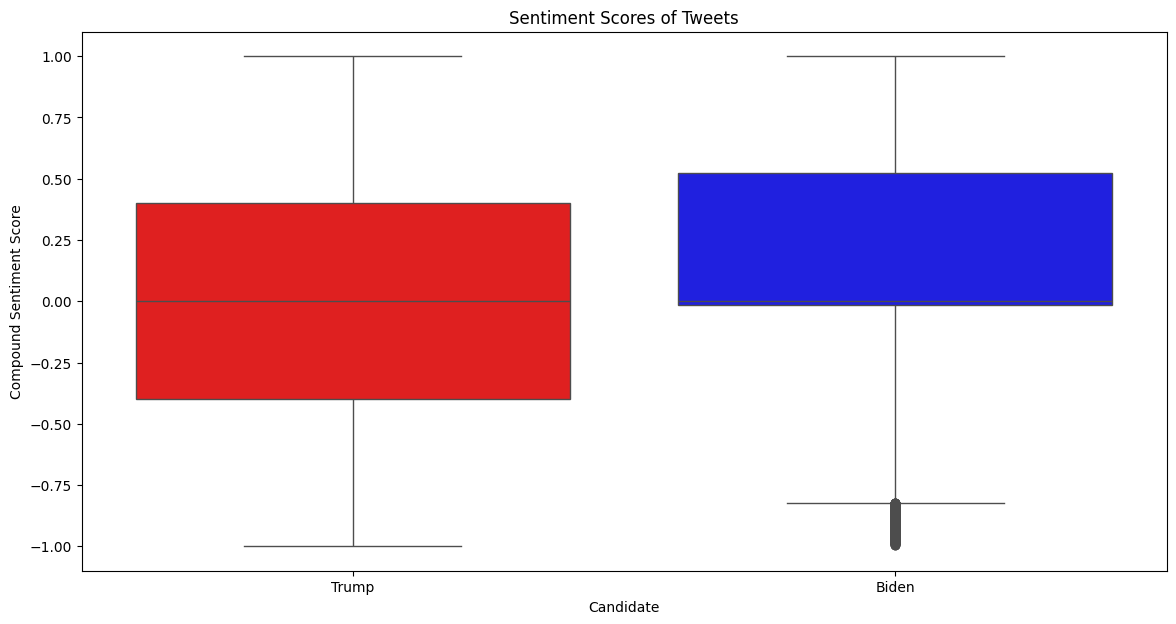

In [ ]:
# boxplot of compound scores by candidate
plt.figure(figsize=(14, 7))

# add column for candidate and combine dfs
trump['candidate'] = 'Trump'
biden['candidate'] = 'Biden'
combined = pd.concat([trump[['candidate', 'compound']], biden[['candidate', 'compound']]])

# create boxplot to show distribution of compound sentiment scores
sns.boxplot(x='candidate', y='compound', data=combined, palette={'Trump': 'red', 'Biden': 'blue'})
plt.title('Sentiment Scores of Tweets')
plt.xlabel('Candidate')
plt.ylabel('Compound Sentiment Score')
plt.show()

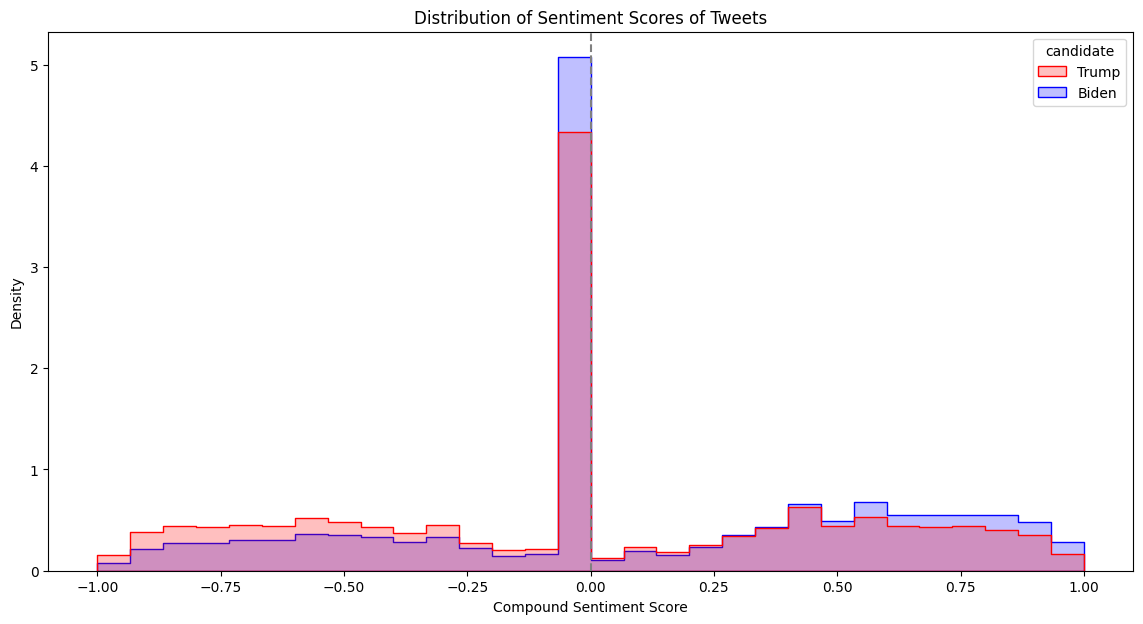

In [ ]:
# histogram of distribution of sentiment scores for each candidate

# create overlapped histogram to difference between scores for each candidate
plt.figure(figsize=(14, 7))
sns.histplot(data=combined, x='compound', hue='candidate', element='step', stat='density', common_norm=False, bins=30, palette={'Trump': 'red', 'Biden': 'blue'})
plt.title('Distribution of Sentiment Scores of Tweets')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Density')
plt.axvline(0, color='grey', linestyle='--')
plt.show()

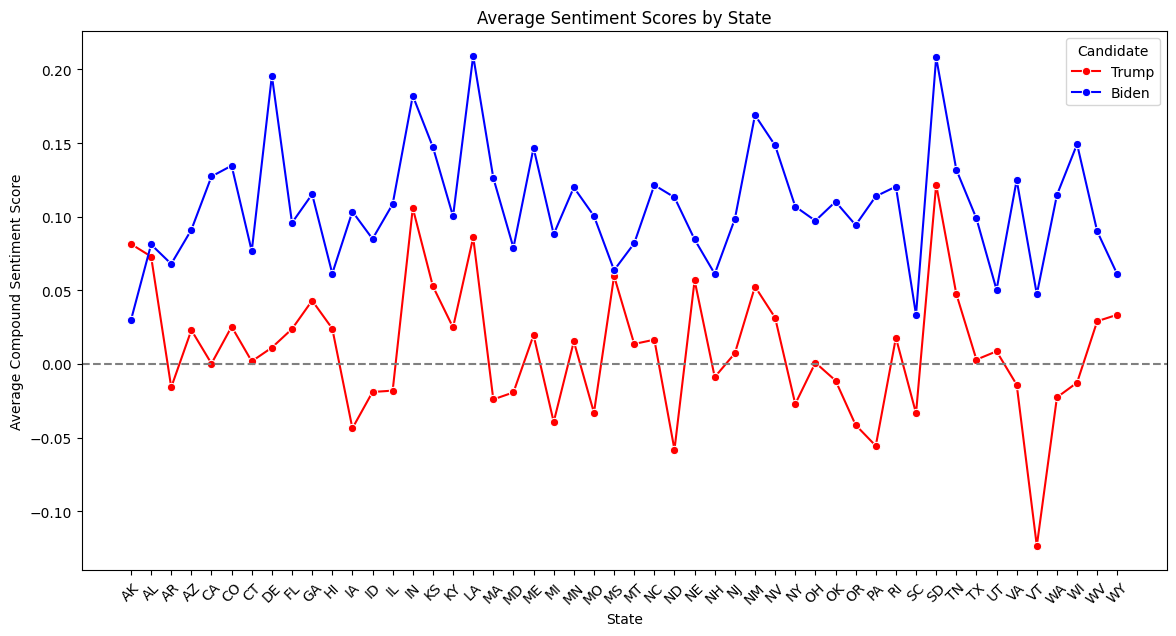

In [ ]:
# linegraph of average compopund scores by state

# group by state and calculate average compound sentiment scores
trump_avg_sentiment = trump.groupby('state_code')['compound'].mean().reset_index()
biden_avg_sentiment = biden.groupby('state_code')['compound'].mean().reset_index()

# add a candidate column and combine dfs
trump_avg_sentiment['candidate'] = 'Trump'
biden_avg_sentiment['candidate'] = 'Biden'
combined_avg_sentiment = pd.concat([trump_avg_sentiment, biden_avg_sentiment], ignore_index=True)

# create linegraph to show average sentiment scores by state
plt.figure(figsize=(14, 7))
sns.lineplot(data=combined_avg_sentiment, x='state_code', y='compound', hue='candidate', marker='o', palette={'Trump': 'red', 'Biden': 'blue'})
plt.title('Average Sentiment Scores by State')
plt.xlabel('State')
plt.ylabel('Average Compound Sentiment Score')
plt.xticks(rotation=45)
plt.axhline(0, color='grey', linestyle='--')
plt.legend(title='Candidate')
plt.show()

## Section 3 - Summary Statistics

In [ ]:
# calculate and display table of average compound sentiment scores
average_sentiment = combined.groupby('candidate')['compound'].mean().reset_index()
average_sentiment.columns = ['Candidate', 'Average Compound Sentiment Score']
print(average_sentiment)

  Candidate  Average Compound Sentiment Score
0     Biden                          0.111159
1     Trump                         -0.000767
